In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
%matplotlib inline

In [90]:
df=pd.read_csv(r"wine (1).csv")

In [91]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [92]:
df.drop("Type",axis=1,inplace=True)

In [93]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [95]:
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)

In [96]:
scaled_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [97]:
#scree plot
pca=PCA()
pca.fit(scaled_df)
pca_data=pca.transform(scaled_data)

In [98]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

In [99]:
per_var

array([36.2, 19.2, 11.1,  7.1,  6.6,  4.9,  4.2,  2.7,  2.2,  1.9,  1.7,
        1.3,  0.8])

In [100]:
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]


<BarContainer object of 13 artists>

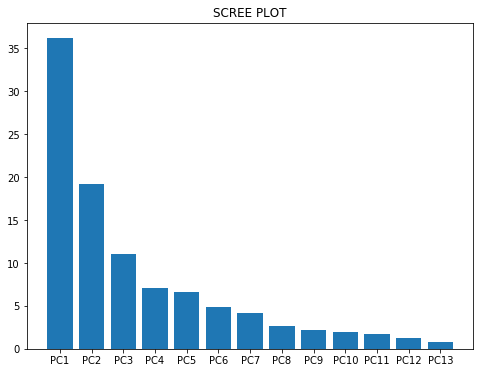

In [101]:
plt.figure(figsize=(8,6))
plt.title("SCREE PLOT")
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

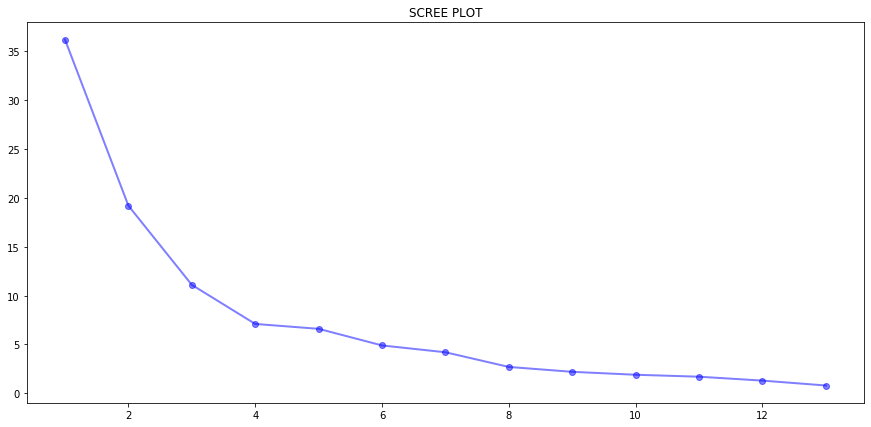

In [102]:
plt.figure(figsize=(15,7))
plt.title("SCREE PLOT")

plt.plot(range(1,len(per_var)+1),per_var,
         linewidth=2.0,
         color='b',
         alpha=0.5,
         marker='o')

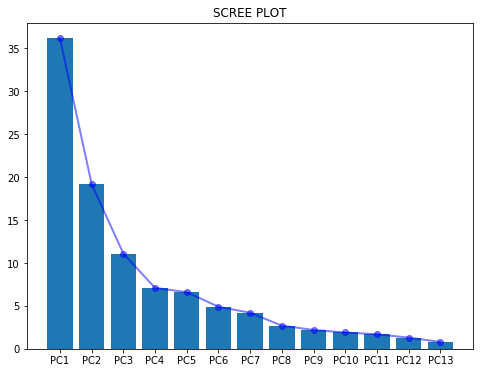

In [103]:
#DUAL AXIS PLOT
plt.figure(figsize=(8,6))
plt.title("SCREE PLOT")
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.plot(range(1,len(per_var)+1),per_var,
         linewidth=2.0,
         color='b',
         alpha=0.5,
         marker='o')

In [104]:
pca=PCA(n_components=3)
pca_data=pca.fit_transform(scaled_data)

In [105]:
pca_data=pd.DataFrame(pca_data,columns=["x","y","z"])

In [106]:
pca_data

,x,y,z
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


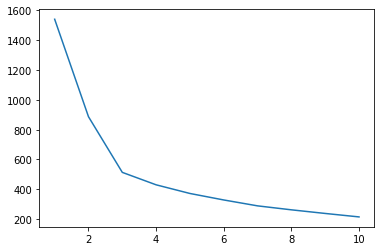

In [107]:
from sklearn.cluster import KMeans
k_rang=range(1,11)
sse=[]
for i in k_rang:
    km=KMeans(n_clusters=i)
    km.fit(pca_data)
    sse.append(km.inertia_)
plt.plot(k_rang,sse)
    

In [108]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(pca_data[["x","y","z"]])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [109]:
pca_data["cluster"]=y_pred

In [110]:
pca_data

,x,y,z,cluster
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [111]:
df1=pca_data[pca_data.cluster==0]
df2=pca_data[pca_data.cluster==1]
df3=pca_data[pca_data.cluster==2]

C:\Users\kuruv\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


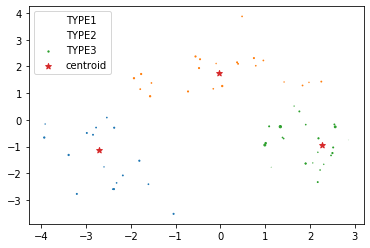

In [112]:
plt.scatter(df1.x,df1.y,df1.z,cmap="blue",label='TYPE1')
plt.scatter(df2.x,df2.y,df1.z,cmap="Green",label='TYPE2')
plt.scatter(df3.x,df3.y,df3.z,cmap="red",label='TYPE3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],cmap="purple",label='centroid',marker='*')
plt.legend()

C:\Users\kuruv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


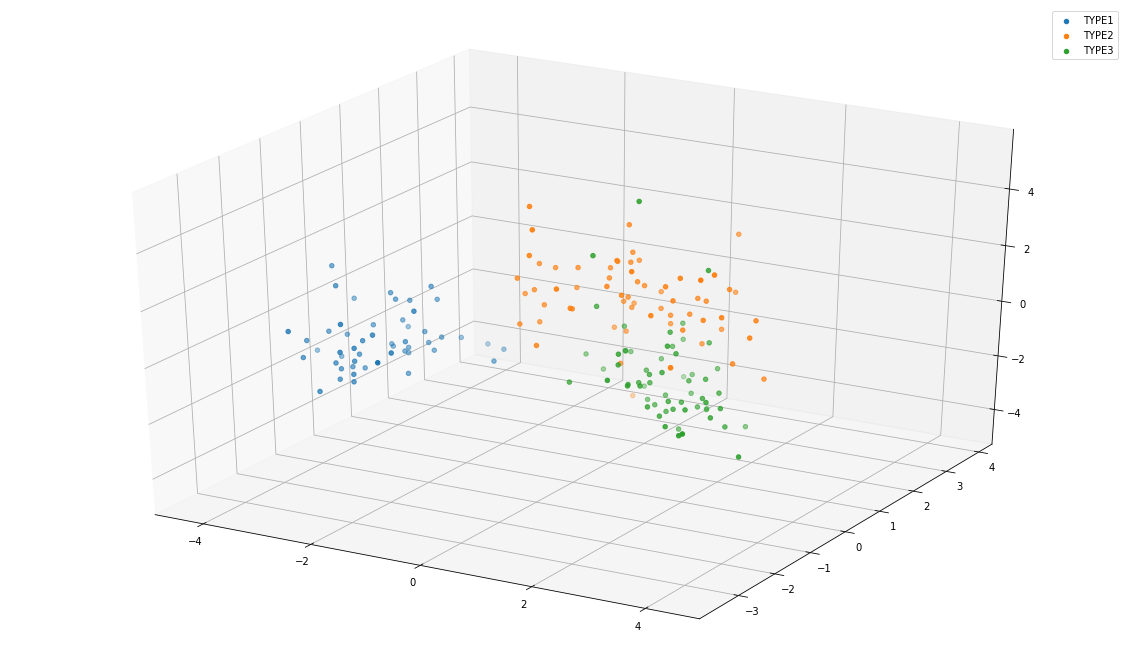

In [113]:
fig = plt.figure(figsize=(20,12))
plt.title("SCATTER PLOT")
ax = plt.axes(projection='3d')
ax.scatter3D(df1.x, df1.y, df1.z,  cmap='Green',label="TYPE1")
ax.scatter3D(df2.x, df2.y, df2.z,  cmap='red',label="TYPE2")
ax.scatter3D(df3.x, df3.y, df3.z,  cmap='blue',label="TYPE3")
plt.legend()
